## Social Media Engagement Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [10]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Indolike Social Media Engagement Analysis\Social Media Dataset.csv")
df.columns = ["ID", "Platform", "Sentiment", "Post"]
df = df.dropna(subset=["Post"])
df.head()

,ID,Platform,Sentiment,Post
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### Preprocessing the texts

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  
    text = re.sub(r"[^a-z\s]", "", text)  
    text = re.sub(r"\s+", " ", text).strip() 
    return text

df["Cleaned_Post"] = df["Post"].apply(clean_text)
df.head()

,ID,Platform,Sentiment,Post,Cleaned_Post
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


### Word Frequency Analysis: Top 20 Words

In [14]:
from collections import Counter

# Combining all cleaned posts into one big string
all_words = " ".join(df["Cleaned_Post"].tolist())

# Counting word frequencies
word_freq = Counter(all_words.split())

# The Top 20 words:
top_20 = word_freq.most_common(20)

import pandas as pd
top_words_df = pd.DataFrame(top_20, columns=["Word", "Frequency"])
top_words_df

,Word,Frequency
0,the,44446
1,i,29237
2,to,28833
3,and,26592
4,a,24168
5,of,19444
6,is,17829
7,for,15610
8,in,15407
9,this,14666


### Number of Posts on Each Platform

Number of Posts by Platform:
Platform
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2

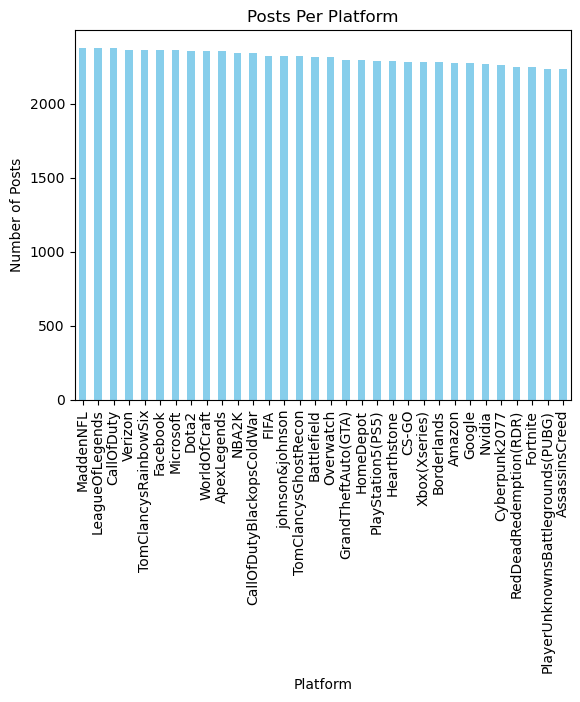

In [16]:
platform_counts = df["Platform"].value_counts()

print("Number of Posts by Platform:")
print(platform_counts)

platform_counts.plot(kind='bar', color='skyblue')
plt.title("Posts Per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.show()

### Sentiment Per Platform

Sentiments on Each Platform:
Sentiment                          Irrelevant  Negative  Neutral  Positive
Platform                                                                  
Amazon                                    186       575     1207       308
ApexLegends                               192       591      936       634
AssassinsCreed                            264       375      156      1439
Battlefield                               915       464      351       586
Borderlands                               240       426      597      1016
CS-GO                                     632       344      548       760
CallOfDuty                                672       883      375       446
CallOfDutyBlackopsColdWar                 569       566      352       856
Cyberpunk2077                             465       385      462       950
Dota2                                     425       767      588       579
FIFA                                      558      1169      102       

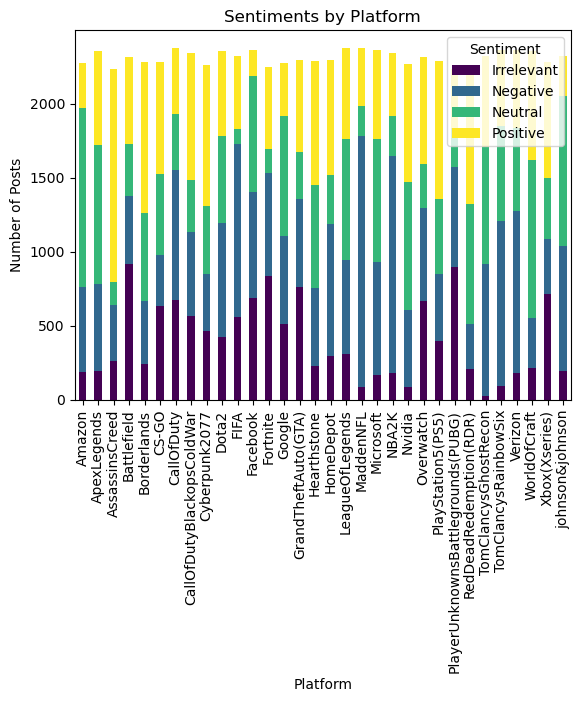

In [17]:
sentiment_counts = df.groupby(["Platform", "Sentiment"]).size().unstack()

print("Sentiments on Each Platform:")
print(sentiment_counts)

sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Sentiments by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.show()

### Word Cloud


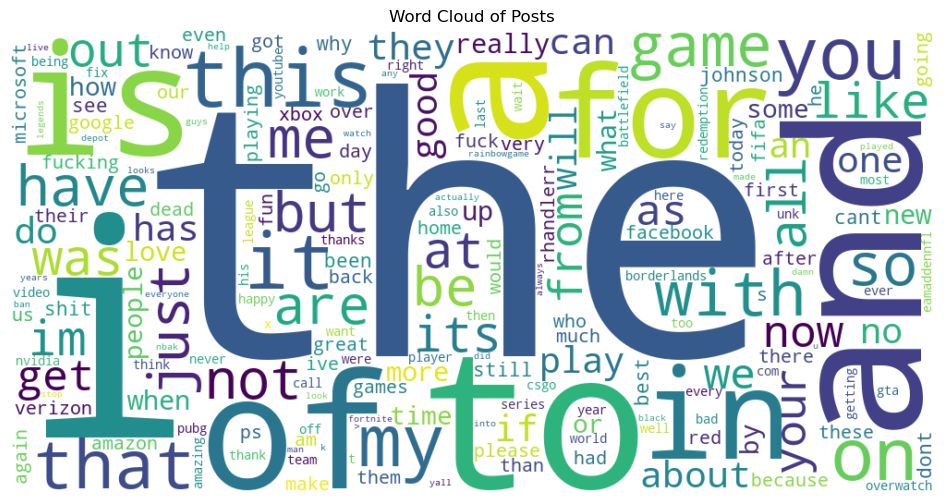

In [21]:
from collections import Counter

all_text = " ".join(df["Cleaned_Post"])
word_list = all_text.split()
word_count = Counter(word_list)

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(word_count)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Posts")
plt.show()

### Analyzing soecific Keywords

In [22]:
keywords = ["love", "kill", "game", "play", "war", "murder", "hate", "fun"]

print("Mentions of Specific Words:")
for word in keywords:
    print(word, ":", word_count[word])

Mentions of Specific Words:
love : 3239
kill : 441
game : 8066
play : 3414
war : 750
murder : 80
hate : 826
fun : 1574
